# Домашнее задание 6 (17 pts)

## Задача 1 (5 pts)

Получите аналитические выражения для проекций на множества

1) (2 pts) Лоренцев конус $\{ (y, t) \in \mathbb{R}^n \times \mathbb{R}_+ \mid \|y\|_2 \leq t\}$

2) (3 pts) множество симметричных положительно полуопределённых матриц, при условии, что проецируемая матрица симметрична


Оцените сложность вычисления проекций для каждого множества.

1. (2 pts) Лоренцев конус $\{ (y, t) \in \mathbb{R}^n \times \mathbb{R}_+ \mid \|y\|_2 \leq t\}$


$С = \{ (x, t) \in \mathbb{R}^n \times \mathbb{R}_+ \mid \|x\|_2 \leq t\}$  
$\pi_C(y) = \argmin_{u \in C} \| u - y \|_2^2$  
Пусть $y \notin C$, следовательно $\| (y_1, \ldots y_n) \| \geq y_{n+1}$, тогда легко видеть, что минимум достигается при $\| x \|_2 = t$.  
Тогда 
\begin{align*}
f_{y}(u) 
    &= \| (u, \| u\|_2) - y \|_2^2 \\
    &= \left(\|u\|_2 - y_{n+1} \right)^2 + \sum_{i=1}^n (u_i - y_i)^2\\
\end{align*}

\begin{align*}
\nabla f_{y}(u)_i 
    &= 2 \left(\|u\|_2 - y_{n+1} \right) \frac{1}{2} \frac{2u_i}{\|u\|_2} + 2(u_i - y_i) \\
    &= 2 (\| u \|_2 - y_{n+1}) \frac{u_i}{\|u\|_2} + 2(u_i - y_i) = 0 \\
    &\Rightarrow \|u\|u_i - y_{n+1} u_i + \|u\|u_i - \|u\|y_i = 0 \\
    &\Rightarrow u_i = \frac{\|u\|y_i}{2\|u\| - y_{n+1}}
\end{align*}

\begin{align*}
    \|u\|_2^2 
        &= \sum_{i=1}^n u_i^2 \\
        &= \sum_{i=1}^n \frac{\|u\|^2 y_i^2}{4\|u\|^2 - 4\|u\|y_{n+1} + y_{n+1}^2} \\
        &= \frac{\|u\|^2}{4\|u\|^2 - 4\|u\|y_{n+1} + y_{n+1}^2} \sum_{i=1}^n y_i^2
\end{align*}
Следовательно 
$$ \sum_{i=1}^n y_i^2 = 4\|u\|^2 - 4\|u\|y_{n+1} + y_{n+1}^2 $$
$$ 4\|u\|^2 - 4\|u\| y_{n+1} + y_{n+1}^2 - \sum_{i=1}^n y_i^2 = 0$$
$$ D = 16 y_{n+1}^2 - 16y_{n+1}^2 + 16\sum_{i=1}^n y_i^2 = 16\sum_{i=1}^n y_i^2$$
$$ \|u\| = \frac{4y_{n+1} + 4\sqrt{\sum_{i=1}^n} y_i^2}{8} = \frac{y_{n+1} + \sqrt{\sum_{i=1}^n} y_i^2}{2}$$

Следовательно если $(x, t) \notin C$
$$ \|u\| = \frac{t + \|x\|}{2} $$
$$ \pi_c((x, y)) = \left(\frac{\|u\|}{2\|u\| - t}, \|u\| \right)$$

Сложность вычисления проекции $O(n)$

3. множество симметричных положительно полуопределённых матриц, при условии, что проецируемая матрица симметрична


$$ C = \{A | A = A^T, xAx \geq 0\}$$
$$ \pi_C(B) = \argmin_{U \in C} \| U - B \|_2$$
Так как $B$ симметричная, то представим ее в виде $Q D Q^T$,
где $D$ - диагональная, $Q$ - ортонормировання.  
Найдем решение в базисе, где $B$ диагональная, потом вернемся в изначальный.  
Тогда 
$$ \pi_C(D) = \argmin_{U \in C} \| U - D \|_2 = \mathrm{diag}(\max(\lambda_1, 0), \ldots \max(\lambda_n, 0))$$ 
$$ \pi_C(B) = Q^T \mathrm{diag}(\max(\lambda_1, 0), \ldots \max(\lambda_n, 0)) Q$$

В этом случае нам необходимо найти собственные векторы и собтсвенные числа матрицы.  
Соответсвенно сложность $O(n^3)$

## Задача 2 (12 pts)

__1.__ Скачайте с помощью кода, приведённого ниже, набор фотографий и нарисуйте какую-нибудь из них.

Shape of data = (400, 64, 64)


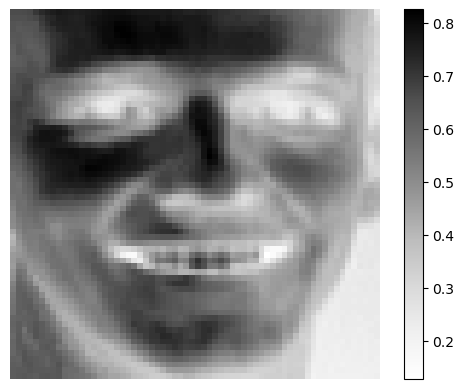

In [1]:
import sklearn.datasets as skldata
import matplotlib.pyplot as plt
import sklearn.decomposition as skdec
%matplotlib inline
data = skldata.fetch_olivetti_faces()
import numpy as np
print("Shape of data = {}".format(data["images"].shape))
index = 42
plt.imshow(data["images"][index], cmap=plt.cm.Greys)
plt.colorbar()
_ = plt.axis("off")

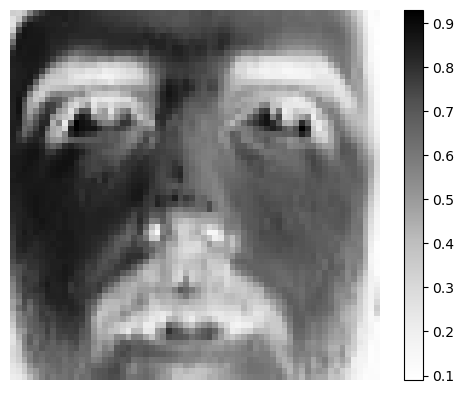

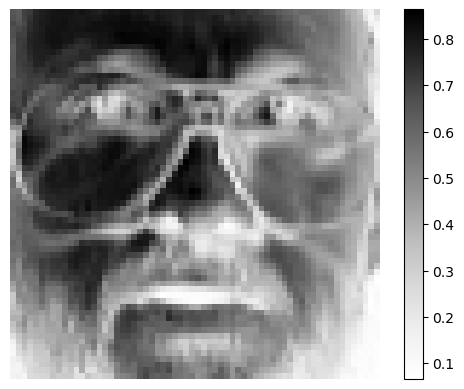

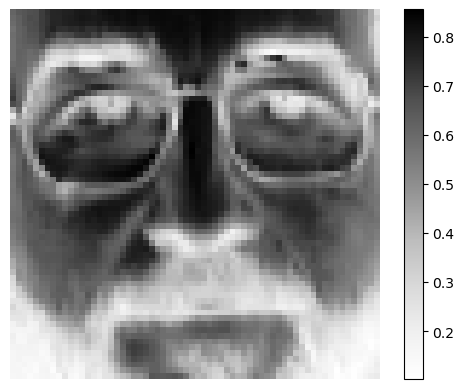

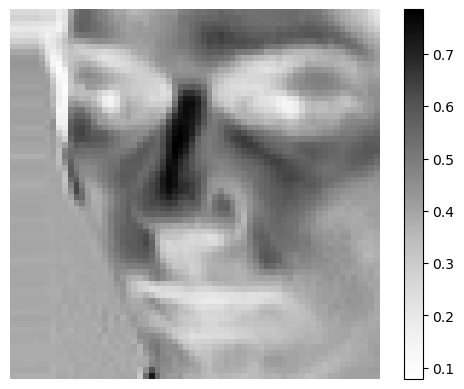

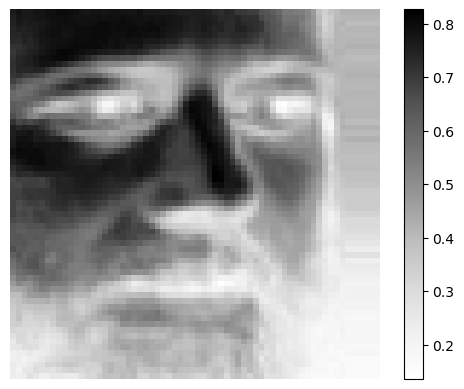

In [2]:
for index in np.random.choice(len(data['images']), 5):
    plt.imshow(data['images'][index], cmap=plt.cm.Greys)
    plt.colorbar()
    _ = plt.axis('off')
    plt.show()

__2.__ Одним из способов обработки изображений, например для выделения наиболее важных сегментов используется метод неотрицательной матричной факторизации ([Nonnegative matrix factorization](https://arxiv.org/pdf/1401.5226.pdf)). 
Идея в том, чтобы решить следующую задачу

\begin{align*}
& \min_{W, H} \frac12 \|X - WH\|^2_F \\
\text{s.t. } & W \geq 0\\
& H \geq 0,
\end{align*}

где знак $\geq$ означает покомпонентное сравнение. 
Также матрицы $W$ и $H$ малого ранга, то есть $W \in \mathbb{R}^{m \times k}$ и $H \in \mathbb{R}^{k \times n}$, где $k$ - параметр, который необходимо настраивать.
Чем больше $k$, тем точнее приближение, но и тем дольше будет решаться задача.
Матрица $X \in \mathbb{R}^{m \times n}$, где $m$ - это число фото в нашем наборе, а $n$ - это количество пикселей в каждой картинке, то есть каждая строка матрицы $X$ - это векторизованная картинка.

**Вопросы**

1) (1 pts) является ли эта задача выпуклой и почему?

2) (1 pts) как можно интерпретировать факторы $W$ и $H$ и почему важна их покомпонентная неотрицательность?

1) (1 pts) является ли эта задача выпуклой и почему? 
Рассмотрим экстремум функции (W_0, H_0).  
Тогда можно переставить столбцы W и строк H соответсвенно и получить тот же результат.  
Следовательно экстремумов несколько и задача не выпуклая.  
2) (1 pts) как можно интерпретировать факторы $W$ и $H$ и почему важна их покомпонентная неотрицательность?
Так как картинки - не случайные матрицы, можно ожидать что у них есть некоторая структура и описывается она меньшим количеством степеней свободы чем $n$. Пусть $k$.  
Тогда матрица $W$ это наш датасет в сжатом пространстве, где каждая картинка зашифрована какими то $k$ числами.  
А матрица $H$ - веса с помощью которых можно из сжатого пространства можно получить обычную картинку.  
Понятно, что вектор $0_k$ - пустая картинка. Соответсвенно каждый элемент вектора длины $k$ добавляет цвета каким то пикселям.  
Поэтому нам важна неотрицательность как каждого элемента в сжатом пространстве, так и веса с которым он будет входить в соответсвующий пиксель картинки.

__3.__ Такую задачу можно решить если воспользоваться идеей попеременной оптимизации (alternating optimization). Идея состоит в том, чтобы на чётных итерациях обновлять параметр $W$ при фиксированном параметре $H$, а на нечётных наоборот: использовать решение для $W$ с предыдущей итерации в качестве фиксированного параметра и обновиться параметр $H$ и так далее до сходимости.
Сначала Вам нужно инициализировать матрицы $W$ и $H$ какими-нибудь матрицами с неотрицательными элементами. От инициализации может сильно зависеть качество решения и скорость работы методов.

**Задачи**

1) (2 pts) реализуйте проксимальный градиентный метод и его ускоренную версию для обновления параметров задачи

2) (4 pts) предложите несколько (> 2) эвристик как именно можно применять реализованные методы для решения поставленной задачи. Постарайтесь предложить максимально эффективные вараинты.

2) (2 pts) нарисуйте график сходимости по функции для каждого из предложенных подходов и убедитесь, что методы сошдлись или же изменение целевой функции пренебрежимо мало. Прокомментируйте результаты и определите какой из предложенных вами подходов оказался наиболее эффективным. Как вы думаете почему?

3) (1 pts) поскольку размерность $H$ - $k \times n$, то каждую строку $H$ можно преобразовать в картинку аналогично тому, как были собраны строки матрицы $X$. Нарисуйте 10-50 картинок полученных из строк матрицы $H$. Что Вы заметили и как это соотносится с ответами на вопрос 2) предыдущего пункта? Используйте ```plt.colorbar()``` и цветовую схему ```plt.cm.Greys``` для более чёткого отображения значений пикселей

4) (1 pts) Нарисуйте матрицу $W$ с помощью функции ```plt.imshow``` или ```plt.spy```. Насколько сильно она заполнена и почему?

Посчитаем градиент от $\frac{1}{2} \| X - WH\| $ по $W$.  
Получается что градиент относительно 
$$
\nabla W_{i, j} = \sum_{k=1}^n \left( \langle W_{i, :}, H_{:, k}\rangle - X_{i, k} \right) H_{k, j}
$$

Обозначим $R = WH - X$, тогда 
$$
\nabla W_{i, j} = \sum_{k=1}^n R_{i, k}  H_{k, j} = \langle R_i, H_j \rangle
$$
$$ 
\nabla W =  R H^T
$$
Получается что градиент относительно 
$$
\nabla H_{i, j} = \sum_{k=1}^m \left( \langle W_{k, :}, H_{:, j}\rangle - X_{k, j} \right) W_{k, i}
$$

Обозначим $R = WH - X$, тогда 
$$
\nabla H_{i, j} = \sum_{k=1}^m R_{k, j} W_{k, i} = \langle R_{:, j} W_{:, i} \rangle$$
$$ 
\nabla H = W^T R
$$

In [32]:
from collections import deque

X = data['data'] 

def func_val(W, H):
    return 0.5 * np.linalg.norm(X - W @ H)**2

def grad_W(W, H):
    return (W @ H - X) @ H.T

def grad_H(W, H):
    return W.T @ (W @ H - X)

def prox(M):
    return np.maximum(M, 0)


def pgm(grad_W, grad_H, prox, W_0, H_0, alpha, num_iter, tol=1e-5, history_max_size=None):
    conv_W = deque([W_0.copy()], maxlen=history_max_size)
    conv_H = deque([H_0.copy()], maxlen=history_max_size)

    W = W_0.copy()
    H = H_0.copy()

    func_vals = [func_val(W, H)]

    for i in range(2 * num_iter):
        if i % 2 == 0:
            W = prox(W - alpha * grad_W(W, H))
            conv_W.append(W.copy())
        else:
            H = prox(H - alpha * grad_H(W, H))
            conv_H.append(H.copy())

        func_vals.append(func_val(W, H))

        if np.abs(func_vals[-1] - func_vals[-2]) < tol:
            break
        

    return W, conv_W, H, conv_H

def pgm_fast(grad_W, grad_H, prox, W_0, H_0, alpha, num_iter, beta, tol=1e-5, history_max_size=None):
    conv_W = deque([W_0.copy(), W_0.copy()], maxlen=history_max_size)
    conv_H = deque([H_0.copy(), H_0.copy()], maxlen=history_max_size)

    W = W_0.copy()
    H = H_0.copy()

    func_vals = [func_val(W, H)]


    for i in range(2 * num_iter):
        if i % 2 == 0:
            W = prox(W - alpha * grad_W(W, H) + beta * (conv_W[-1] - conv_W[-2]))
            conv_W.append(W.copy())
        else:
            H = prox(H - alpha * grad_H(W, H) + beta * (conv_H[-1] - conv_H[-2]))
            conv_H.append(H.copy())

        func_vals.append(func_val(W, H))

        if np.abs(func_vals[-1] - func_vals[-2]) < tol:
            break

    
    return W, conv_W, H, conv_H


In [40]:
m = X.shape[0]
n = X.shape[1]
k = 400

np.random.seed(11)
W = np.random.random((m, k))
H = np.random.random((k, n))

W, conv_W, H, conv_H = pgm(grad_W, grad_H, prox, W, H, 1e-6, 1000, history_max_size=100)
W_fast, conv_W_fast, H_fast, conv_H_fast = pgm_fast(grad_W, grad_H, prox, W, H, 1e-6, 1000, 0.9, history_max_size=100)


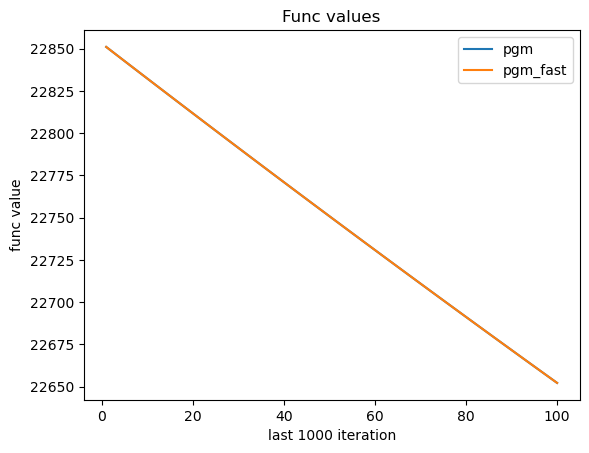

In [42]:
func_vals = [func_val(W, H) for W, H in zip(conv_W, conv_H)]
func_vals_fast = [func_val(W, H) for W, H in zip(conv_W_fast, conv_H_fast)]

plt.title('Func values')
plt.plot(np.arange(len(func_vals)) + 1, func_vals, label='pgm')
plt.plot(np.arange(len(func_vals)) + 1, func_vals, label='pgm_fast')
plt.xlabel('last 1000 iteration')
plt.ylabel('func value')
plt.legend()
plt.show()

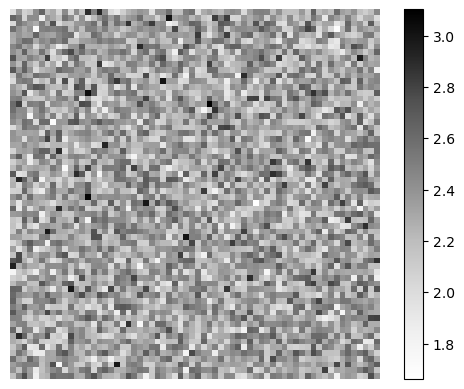

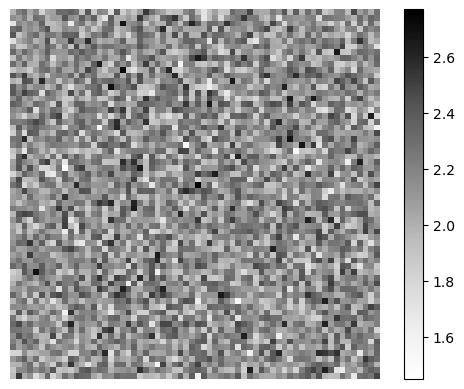

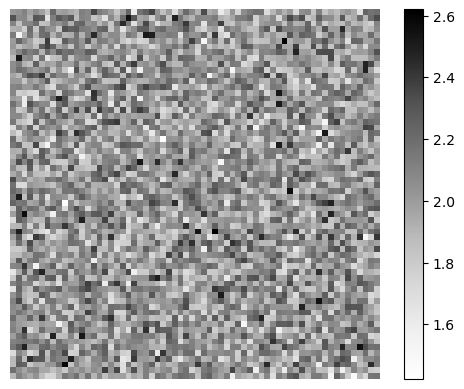

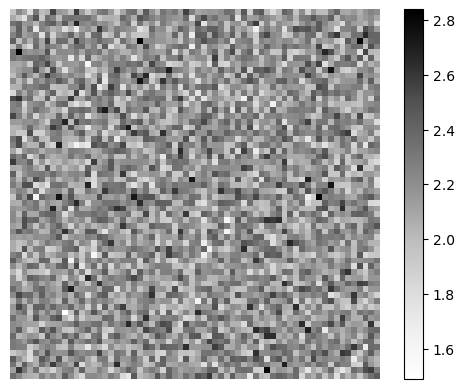

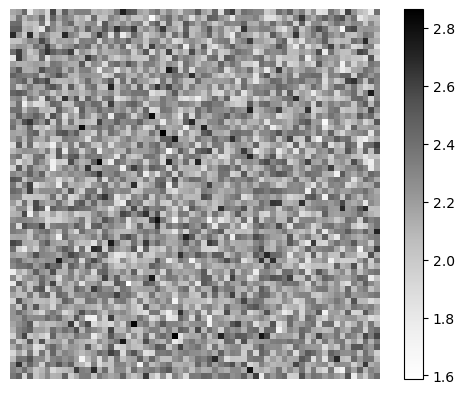

In [35]:
data['new_imags'] = (W @ H).reshape(data['images'].shape)

for index in np.random.choice(len(data['images']), 5):
    plt.imshow(data['new_imags'][index], cmap=plt.cm.Greys)
    plt.colorbar()
    _ = plt.axis('off')
    plt.show()

Метод явно не сошелся, разница между быстрым и небыстрым методом очень маленькая, потому что градиенты в начале огромные.  
Потом же наоборот шаг становится слишком маленький.  

Особо поэксперементировать с параметрами и разными инцилизациями не успел.  
